# Time Series Analysis of Solar Data - Data Wrangling


### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

### Import data

In [2]:
df = pd.DataFrame()
for year in range(2015,2021):
    file = '../data/raw/resolararraydata/' + str(year) + ' data.csv'
    year_data = pd.read_csv(file, parse_dates=[0], index_col=0)
    df = pd.concat([df,year_data])

In [3]:
df.head()

,"Shark Meter, KWtotal Kilowatts","AE 500kW 1, AC Power Kilowatts","AE 500kW 2, AC Power Kilowatts",(Offline) Weather Station - POA (POA)* Watts/meter²,Weather Station (POA) (SO31456) (POA)* Watts/meter²,"RECx31 Weather Station, Module Temp Degrees Celsius","RECx31 Weather Station, Ambient Temp Degrees Celsius","Weather Station (POA) (SO31456), CabF Degrees Celsius","(Offline) Weather Station - POA, CabF Degrees Celsius","AE 500kW 1, PV current Amps","AE 500kW 2, PV current Amps","AE 500kW 1, PV voltage Volts","AE 500kW 2, PV voltage Volts"
Site Time,,,,,,,,,,,,,
2015-01-01 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:15:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:45:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(210528, 13)

In [5]:
df.dtypes

Shark Meter, KWtotal Kilowatts                            object
AE 500kW 1, AC Power Kilowatts                           float64
AE 500kW 2, AC Power Kilowatts                           float64
(Offline) Weather Station - POA (POA)* Watts/meter²       object
Weather Station (POA) (SO31456) (POA)* Watts/meter²       object
RECx31 Weather Station, Module Temp Degrees Celsius      float64
RECx31 Weather Station, Ambient Temp Degrees Celsius     float64
Weather Station (POA) (SO31456), CabF Degrees Celsius    float64
(Offline) Weather Station - POA, CabF Degrees Celsius    float64
AE 500kW 1, PV current Amps                              float64
AE 500kW 2, PV current Amps                              float64
AE 500kW 1, PV voltage Volts                             float64
AE 500kW 2, PV voltage Volts                             float64
dtype: object

We've got a few columns which were read in as strings, probably because they have commas in them, so let's strip the commas.  

In [6]:
df.replace(',','', regex=True, inplace=True)
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [7]:
df.dtypes

Shark Meter, KWtotal Kilowatts                           float64
AE 500kW 1, AC Power Kilowatts                           float64
AE 500kW 2, AC Power Kilowatts                           float64
(Offline) Weather Station - POA (POA)* Watts/meter²      float64
Weather Station (POA) (SO31456) (POA)* Watts/meter²      float64
RECx31 Weather Station, Module Temp Degrees Celsius      float64
RECx31 Weather Station, Ambient Temp Degrees Celsius     float64
Weather Station (POA) (SO31456), CabF Degrees Celsius    float64
(Offline) Weather Station - POA, CabF Degrees Celsius    float64
AE 500kW 1, PV current Amps                              float64
AE 500kW 2, PV current Amps                              float64
AE 500kW 1, PV voltage Volts                             float64
AE 500kW 2, PV voltage Volts                             float64
dtype: object

### Fix Index

Turns out we have duplicate entries in our timeseries index so we need to fix that.  

In [8]:
df.index.is_unique

False

In [9]:
df = df.groupby(level=0).mean()

In [10]:
df = df.asfreq(freq='15T')

In [11]:
df.index

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 00:15:00',
               '2015-01-01 00:30:00', '2015-01-01 00:45:00',
               '2015-01-01 01:00:00', '2015-01-01 01:15:00',
               '2015-01-01 01:30:00', '2015-01-01 01:45:00',
               '2015-01-01 02:00:00', '2015-01-01 02:15:00',
               ...
               '2020-12-31 21:30:00', '2020-12-31 21:45:00',
               '2020-12-31 22:00:00', '2020-12-31 22:15:00',
               '2020-12-31 22:30:00', '2020-12-31 22:45:00',
               '2020-12-31 23:00:00', '2020-12-31 23:15:00',
               '2020-12-31 23:30:00', '2020-12-31 23:45:00'],
              dtype='datetime64[ns]', name='Site Time', length=210432, freq='15T')

### Plot Kilowatts

The shark meter is the sum of the two interverters, each of which is connected to 2500 solar panels.  The maximum power output of each inverter is 500 kW.  The system is designed so that the maximum power is reached consistently, but it is reached more hours per day during the summer months. The power generated is going to be equal to the current * voltage.  The voltage is a function of the temperate, the current is a function of the irradiance.  

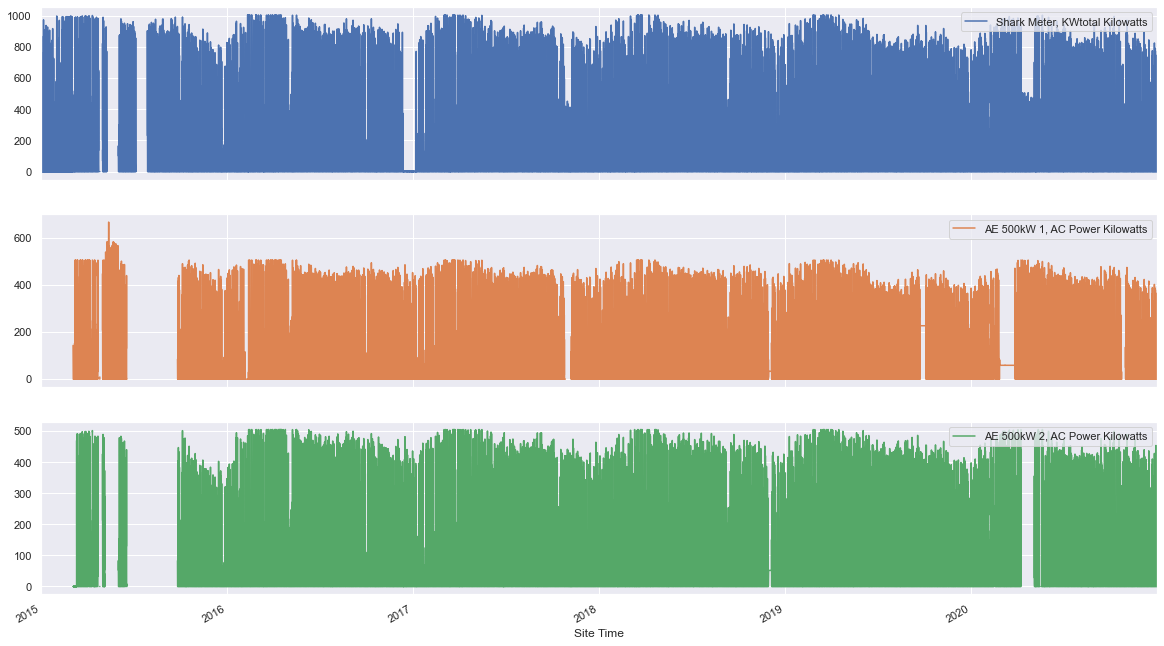

In [12]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']]\
        .plot(subplots=True, layout=(3,1), figsize=(20,12));

We've got so much missing data before late 2015, let's just drop the data before then.  

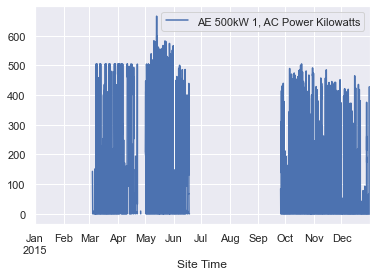

In [13]:
df[['AE 500kW 1, AC Power Kilowatts']].loc['2015'].plot();

So let's get rid of the data prior to Oct 2015.  

In [14]:
df = df.loc['2015-10':]

Now let's plot it again

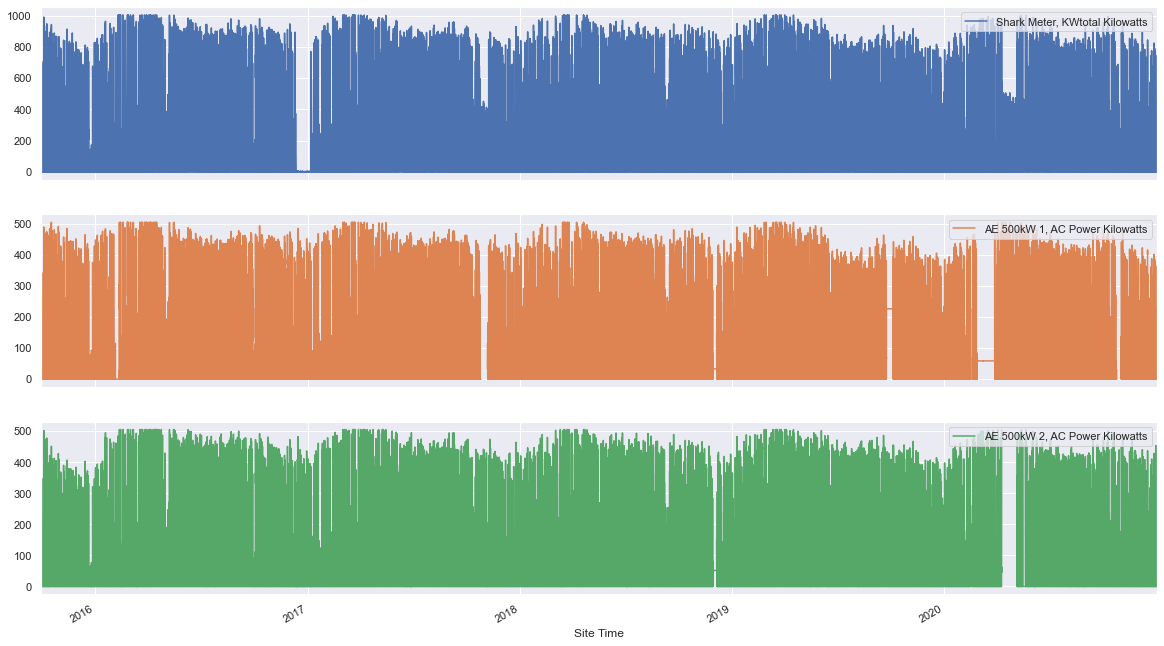

In [15]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']]\
        .plot(subplots=True, layout=(3,1), figsize=(20,12));

Let's look at the big hole in the meter in late 2016.

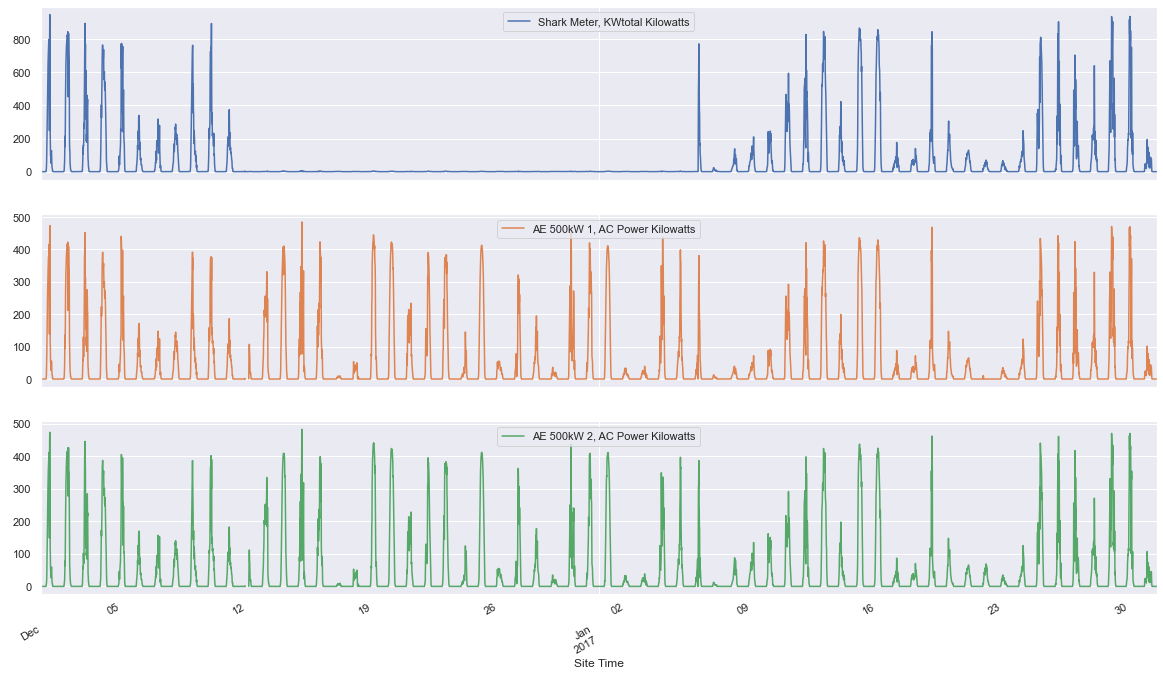

In [16]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']].loc['2016-12':'2017-01'].plot(subplots=True, layout=(3,1),figsize=(20,12));

So we see that in this case, we don't have nulls, but we certainly can consider this missing data (a reporting problem) since the two inverters are producing data at this time.  For this case, we can fill the data with the sum of the two invertes.  

In [17]:
df['Shark Meter, KWtotal Kilowatts'].loc['2016-12-12':'2017-01-05'] = df.loc['2016-12-12':'2017-01-05'].apply(lambda x: x['AE 500kW 1, AC Power Kilowatts'] + x['AE 500kW 2, AC Power Kilowatts'], axis=1)

Now let's look at it again.

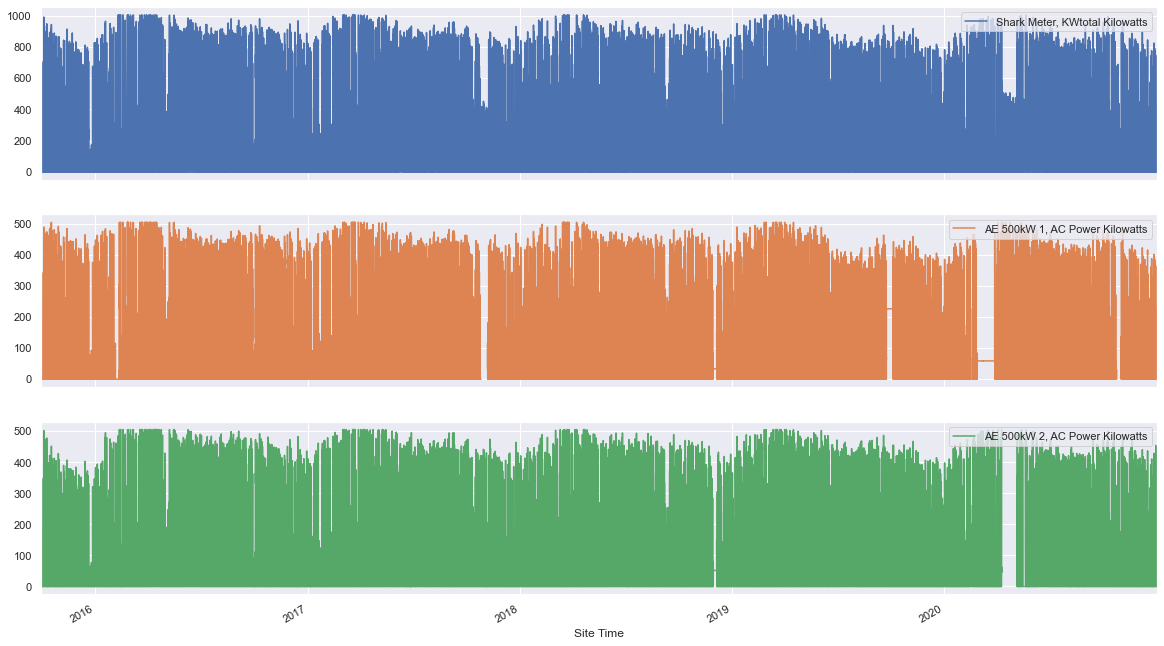

In [18]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']]\
        .plot(subplots=True, layout=(3,1), figsize=(20,12));

Now we've also got two sections where an inverter was out and we have low output.  Since we want to forecast overall trend let's fill these so that they don't impact our overall trend.  Note this is just for our general forecast.

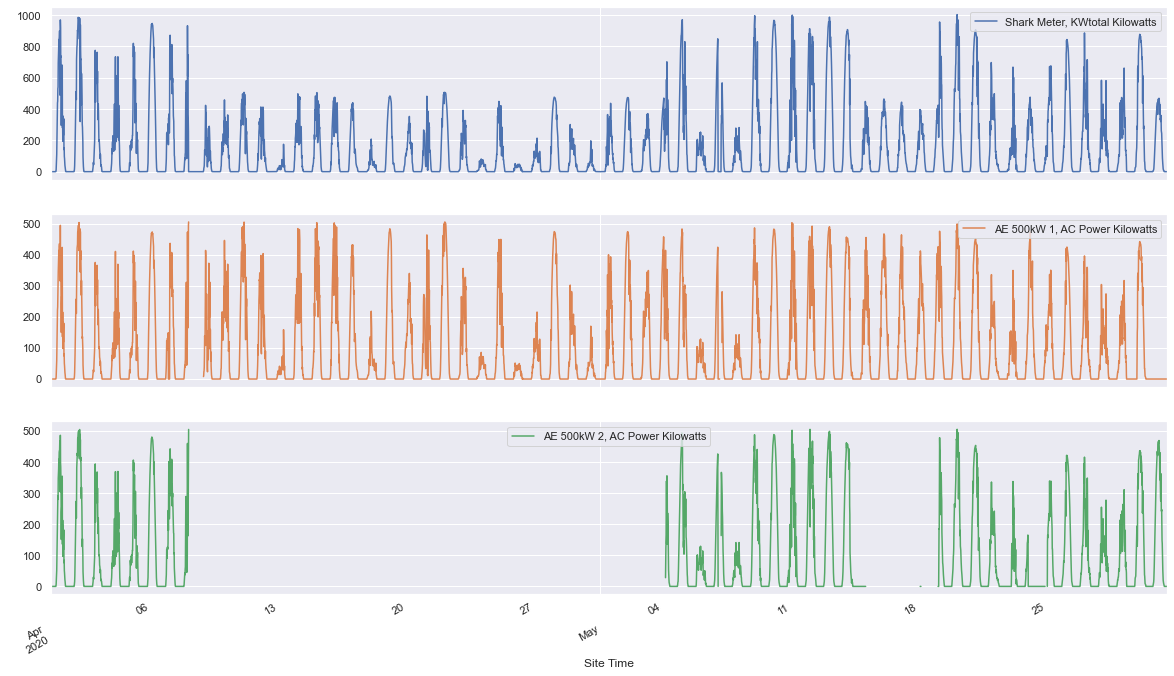

In [19]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']].loc['2020-04':'2020-05'].plot(subplots=True, layout=(3,1),figsize=(20,12));

During this time let's replace the shark meter with twice the power of inverter 1.

In [20]:
df['Shark Meter, KWtotal Kilowatts'].loc['2020-04-06':'2020-05-20'] = df.loc['2020-04-06':'2020-05-20'].apply(lambda x: 2*x['AE 500kW 1, AC Power Kilowatts'], axis=1)

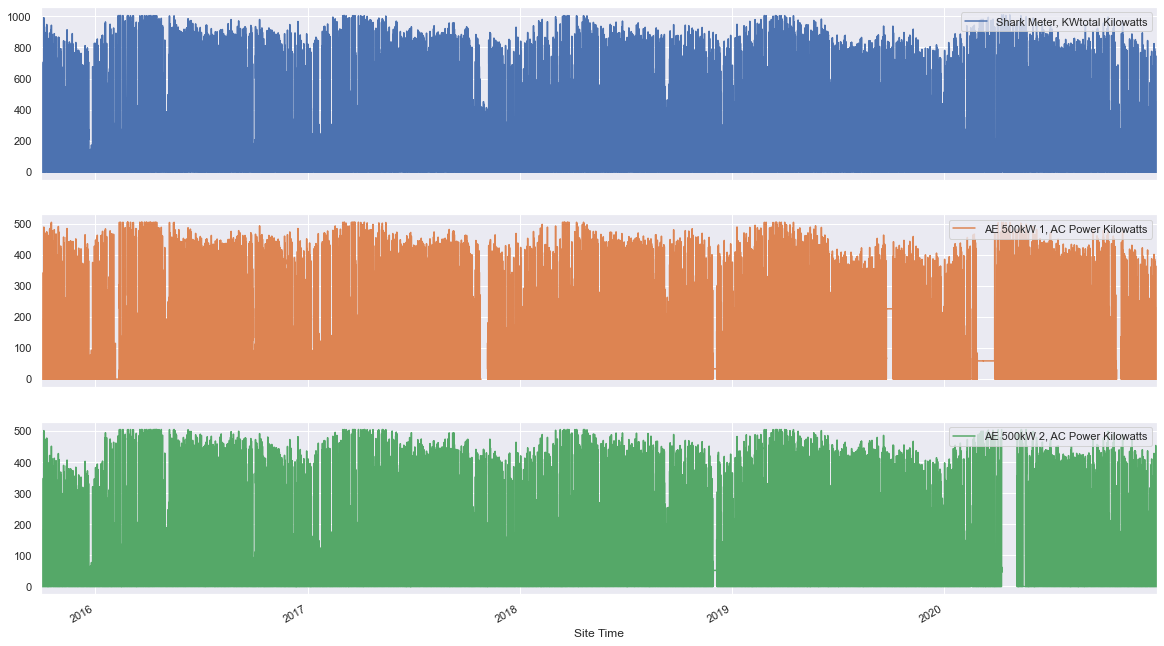

In [21]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']]\
        .plot(subplots=True, layout=(3,1), figsize=(20,12));

Let's do the same when inverter 1 was out in late 2017.  

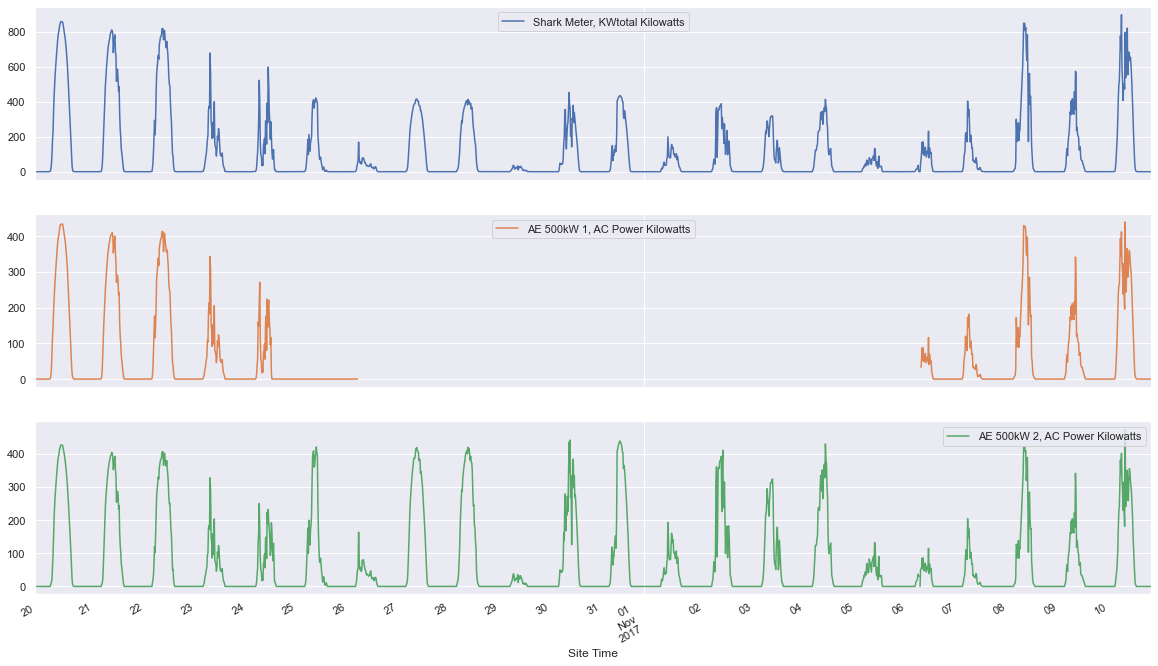

In [22]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']].loc['2017-10-20':'2017-11-10'].plot(subplots=True, layout=(3,1),figsize=(20,12));

In [23]:
df['Shark Meter, KWtotal Kilowatts'].loc['2017-10-20':'2017-11-10'] = df.loc['2017-10-20':'2017-11-10'].apply(lambda x: 2*x['AE 500kW 2, AC Power Kilowatts'], axis=1)

That looks better and we can now use the shark meter data for forecasting.  Let's check for null values however.

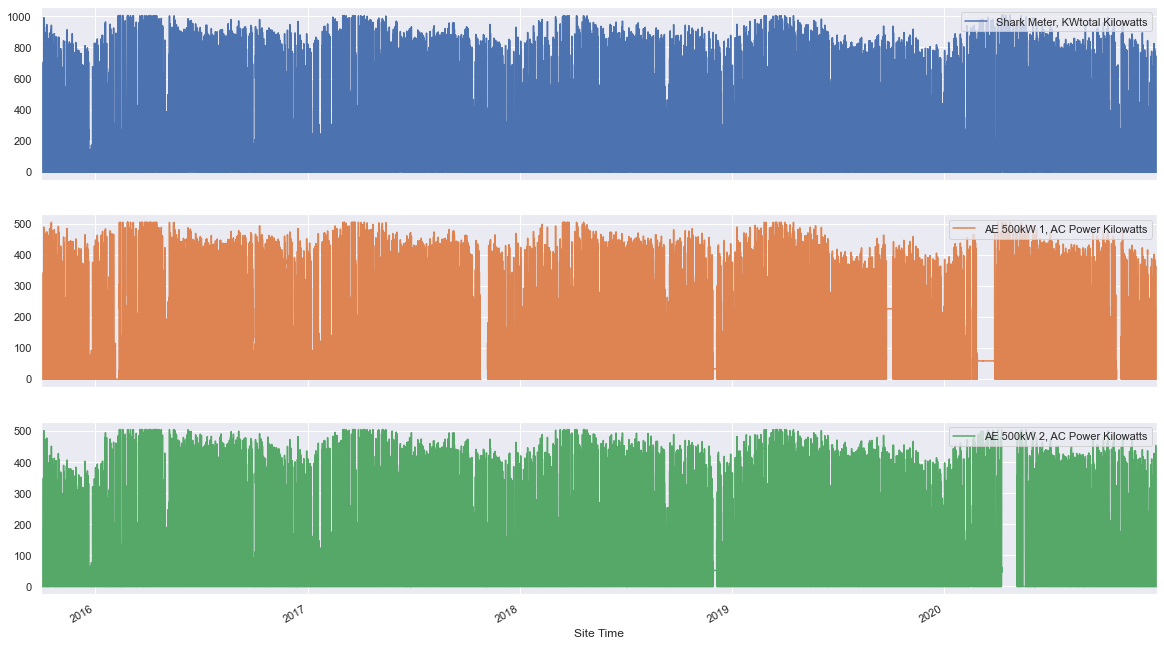

In [24]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']]\
        .plot(subplots=True, layout=(3,1), figsize=(20,12));

In [25]:
df['Shark Meter, KWtotal Kilowatts'].isnull().sum()

136

Not alot, so let's also fill these with 0. 

In [26]:
df['Shark Meter, KWtotal Kilowatts'].fillna(0, inplace=True)

### Plot Irradiance

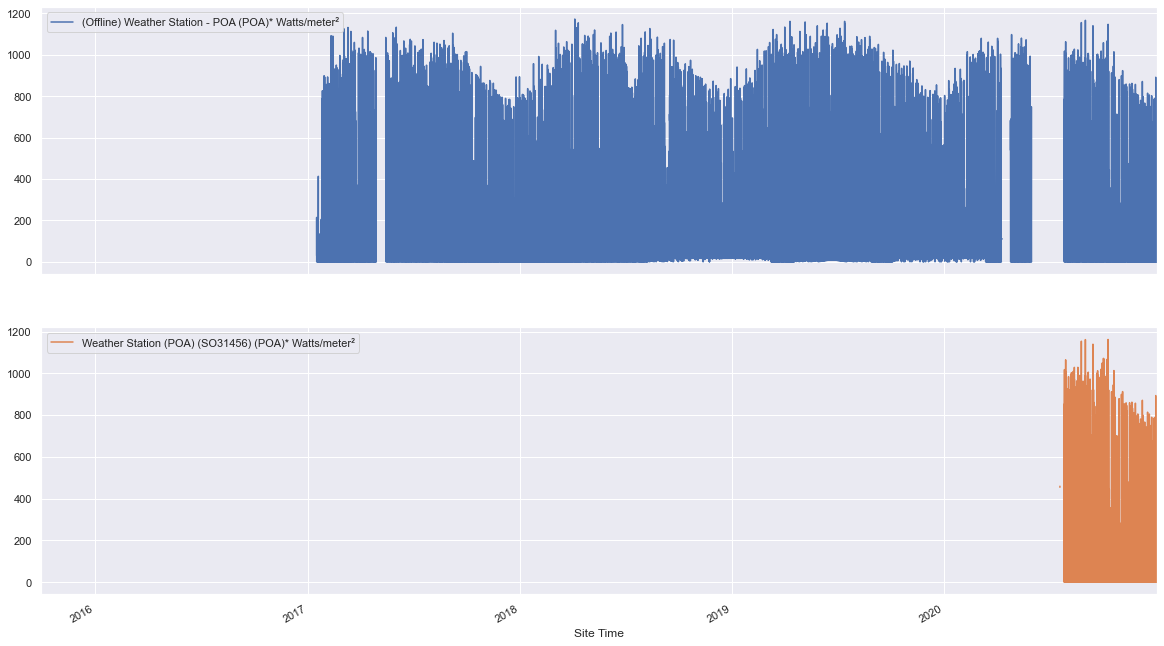

In [27]:
df[['(Offline) Weather Station - POA (POA)* Watts/meter²','Weather Station (POA) (SO31456) (POA)* Watts/meter²']]\
        .plot(subplots=True, layout=(2,1), figsize=(20,12));

We can see that they brough online a new device for measuring irradiance early in 2002, but we still have data from the old device and it's matching the new device, so let's just delete the column for the new device.  Note, however, that we only have data from the old device beginning in 2017.  

In [28]:
df.drop(columns=['Weather Station (POA) (SO31456) (POA)* Watts/meter²'], inplace=True)

### Plot temperature measurements

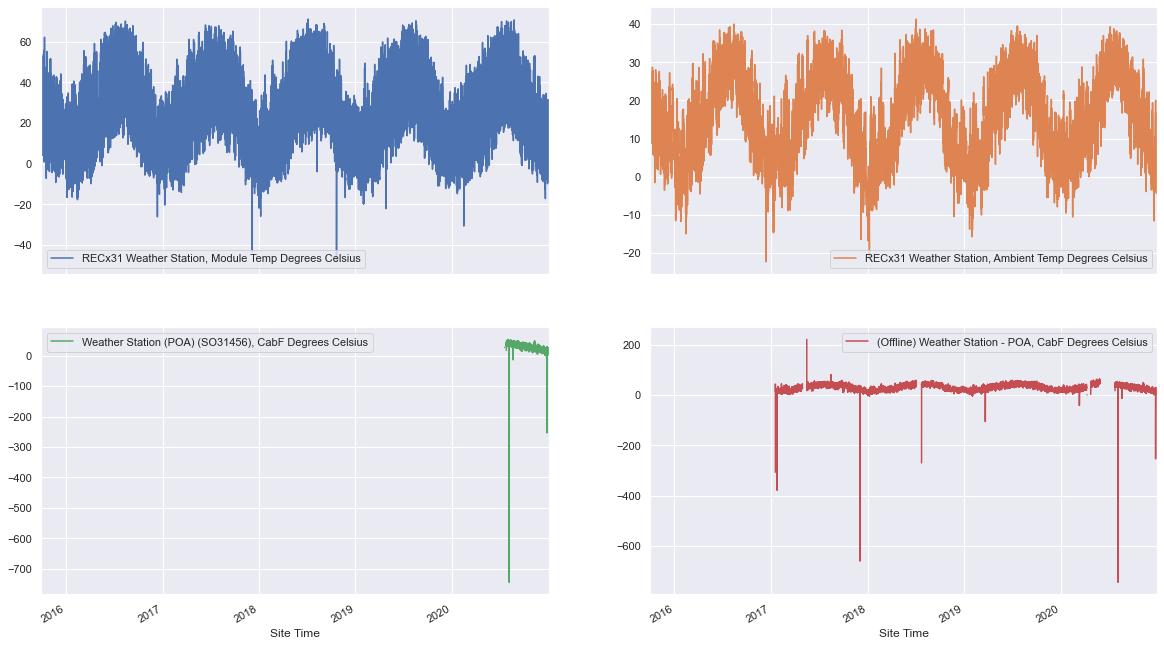

In [29]:
df[['RECx31 Weather Station, Module Temp Degrees Celsius','RECx31 Weather Station, Ambient Temp Degrees Celsius',\
       'Weather Station (POA) (SO31456), CabF Degrees Celsius','(Offline) Weather Station - POA, CabF Degrees Celsius']]\
        .plot(subplots=True, layout=(2,2), figsize=(20,12));

Again, the two CabF measurements have not been online the entire time, they have lots of outliers in the data, and we have the other two measurements so let's drop those.  

In [30]:
df.drop(columns=['Weather Station (POA) (SO31456), CabF Degrees Celsius','(Offline) Weather Station - POA, CabF Degrees Celsius'], inplace=True)

### Plot current and voltage measurements

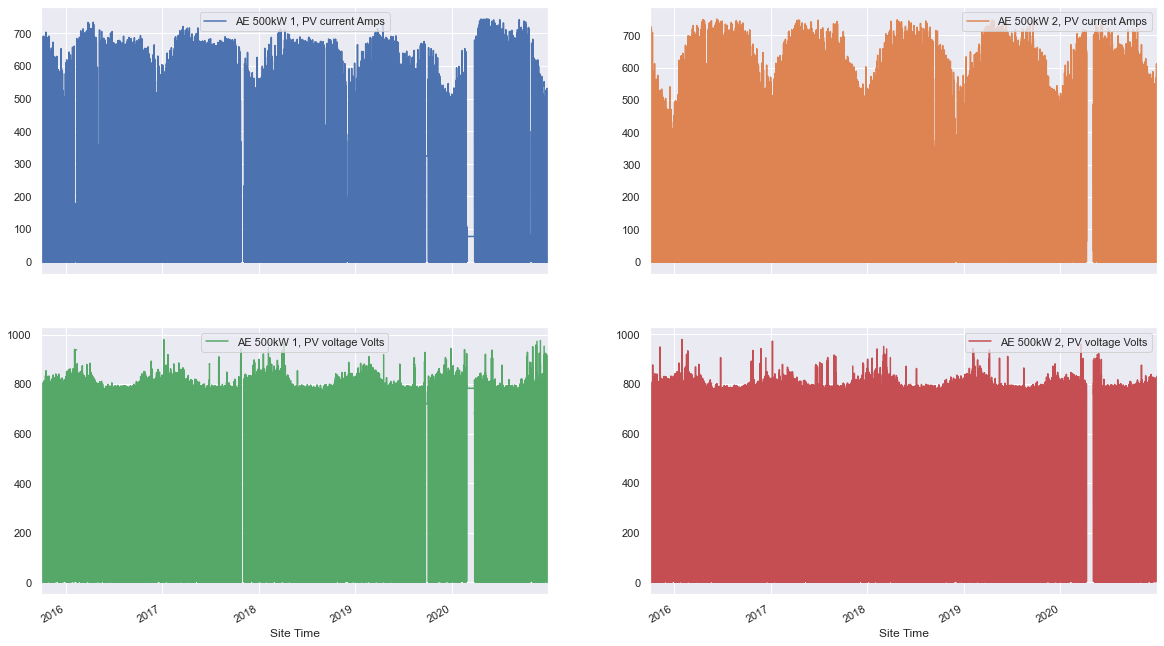

In [31]:
df[['AE 500kW 1, PV current Amps','AE 500kW 2, PV current Amps','AE 500kW 1, PV voltage Volts','AE 500kW 2, PV voltage Volts']]\
        .plot(subplots=True, layout=(2,2), figsize=(20,12));

### Plot KWatt Hours

We're going to calculate KWH by averaging the power measurements over a hour.  

In [32]:
df_hourly = df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts', 'AE 500kW 2, AC Power Kilowatts']].resample('H').mean()

In [33]:
df_hourly.columns = ['Shark Meter, KWH','AE 500kW 1, KWH','AE 500kW 2, KWH']

It's still hard to see the seasonal variation because the data is so noisy, so let's plot a rolling average of a day.  

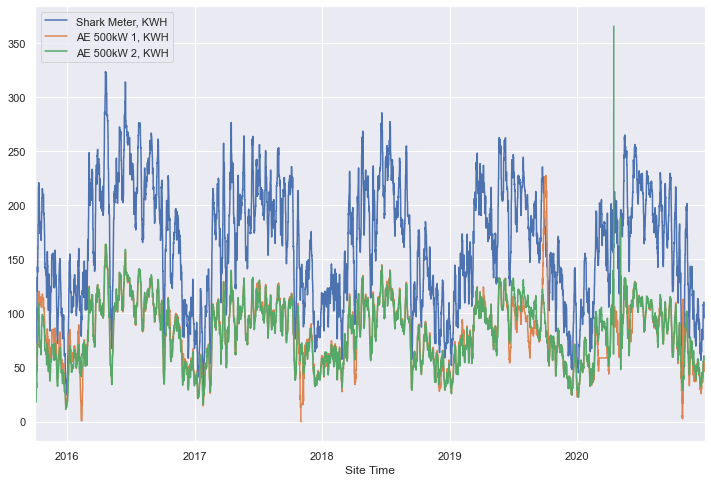

In [34]:
df_hourly.rolling(window='7D').mean().plot(figsize=(12,8));

Now we clearly see the seasonal varation in energy, and we see that the meter's output is the sum of the two inverters.  We can see where the second inverter had some sort of outage.  

### Add Hour and Month to both our 15-minute and Hourly data

In [35]:
df['Month']=df.index.month
df['Hour']=df.index.hour
df['Year']=df.index.year
df_hourly['Month']=df_hourly.index.month
df_hourly['Hour']=df_hourly.index.hour
df_hourly['Year']=df_hourly.index.hour

In [36]:
df.columns

Index(['Shark Meter, KWtotal Kilowatts', 'AE 500kW 1, AC Power Kilowatts',
       'AE 500kW 2, AC Power Kilowatts',
       '(Offline) Weather Station - POA (POA)* Watts/meter²',
       'RECx31 Weather Station, Module Temp Degrees Celsius',
       'RECx31 Weather Station, Ambient Temp Degrees Celsius',
       'AE 500kW 1, PV current Amps', 'AE 500kW 2, PV current Amps',
       'AE 500kW 1, PV voltage Volts', 'AE 500kW 2, PV voltage Volts', 'Month',
       'Hour', 'Year'],
      dtype='object')

In [37]:
df_hourly.columns

Index(['Shark Meter, KWH', 'AE 500kW 1, KWH', 'AE 500kW 2, KWH', 'Month',
       'Hour', 'Year'],
      dtype='object')

### Write out 15-min and Hourly Data 

In [40]:
# Let's output data for now so we can do some forecasting and see how that works
df[['Shark Meter, KWtotal Kilowatts', 'AE 500kW 1, AC Power Kilowatts',
       'AE 500kW 2, AC Power Kilowatts',
       '(Offline) Weather Station - POA (POA)* Watts/meter²',
       'RECx31 Weather Station, Module Temp Degrees Celsius',
       'RECx31 Weather Station, Ambient Temp Degrees Celsius',
       'AE 500kW 1, PV current Amps', 'AE 500kW 2, PV current Amps',
       'AE 500kW 1, PV voltage Volts', 'AE 500kW 2, PV voltage Volts']].to_csv('../data/interim/fifteen_minute_data.csv')

In [41]:
df_hourly.to_csv('../data/interim/hourly_data.csv')